In [169]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [170]:
df1=pd.read_csv("bengaluru_house_prices.csv")

In [171]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [172]:
df1.size

119880

In [173]:
df1.shape

(13320, 9)

In [174]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [175]:
df2=df1.drop(['availability','society','area_type','balcony'],axis='columns')

In [176]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [177]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [178]:
df3=df2.dropna()

In [179]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [180]:
df3.shape

(13246, 5)

In [181]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [182]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [183]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\91637\AppData\Local\Temp\ipykernel_9568\1156995945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [184]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [185]:
df3.drop(['size'],axis='columns',inplace=True)

C:\Users\91637\AppData\Local\Temp\ipykernel_9568\3826727190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['size'],axis='columns',inplace=True)


In [186]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [187]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [188]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [189]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [190]:
df4.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [191]:
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK


In [192]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [193]:
df5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [194]:
len(df5['location'].unique())

1304

In [195]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [196]:
len(location_stats[location_stats<10])

1039

In [197]:
location_stats_less_than_10=location_stats[location_stats<10]

In [198]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [199]:
len(df5['location'].unique())

255

In [200]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Ganga Nagar', 'HSR Layout',
       'Doddathoguru', 'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Bommanahalli', 'Gunjur',
       'Devarachikkanahalli', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'Kaval Byrasandra',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',


In [201]:
df3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [202]:
df5.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [203]:
min_thresh,max_thresh=df5.price_per_sqft.quantile([0.01,0.999])

In [204]:
min_thresh

2549.753694581281

In [205]:
max_thresh

50959.580419581405

In [206]:
df5[df5.price_per_sqft<min_thresh]

,location,total_sqft,bath,price,BHK,price_per_sqft
20,Kengeri,600.0,1.0,15.00,1,2500.000000
132,Electronic City,880.0,1.0,16.50,2,1875.000000
171,Attibele,450.0,1.0,11.00,1,2444.444444
250,Chandapura,800.0,1.0,20.00,2,2500.000000
253,other,900.0,2.0,22.50,2,2500.000000
...,...,...,...,...,...,...
12574,other,2559.0,1.0,55.00,1,2149.277061
12579,Chandapura,410.0,1.0,10.00,1,2439.024390
12648,Electronic City,1125.0,2.0,28.13,2,2500.444444
12672,Kumaraswami Layout,1200.0,2.0,29.00,2,2416.666667


In [207]:
df5[df5.price_per_sqft>max_thresh]

,location,total_sqft,bath,price,BHK,price_per_sqft
349,other,11.0,3.0,74.0,3,6.727273e+05
1020,other,15.0,1.0,30.0,1,2.000000e+05
1122,other,24.0,2.0,150.0,5,6.250000e+05
4086,Sarjapur Road,1.0,4.0,120.0,4,1.200000e+07
4972,other,5.0,7.0,115.0,7,2.300000e+06
5970,Mysore Road,45.0,1.0,23.0,1,5.111111e+04
6421,Bommenahalli,2940.0,3.0,2250.0,4,7.653061e+04
7088,other,650.0,1.0,500.0,1,7.692308e+04
7657,other,425.0,1.0,750.0,1,1.764706e+05
7883,other,2000.0,3.0,1063.0,4,5.315000e+04


In [208]:
df6=df5[(df5.price_per_sqft>min_thresh) & (df5.price_per_sqft<max_thresh)]

In [209]:
df6

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [210]:
df5.shape

(13246, 6)

In [211]:
df6.shape

(13050, 6)

In [212]:
df5['bedroom_space']=df5['total_sqft']/df5['BHK']

In [213]:
df5

,location,total_sqft,bath,price,BHK,price_per_sqft,bedroom_space
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.00
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.00
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.00
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.00
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926,690.60
13316,other,3600.0,5.0,400.00,4,11111.111111,900.00
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136,570.50
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319,1172.25


In [214]:
df5.describe()

,total_sqft,bath,price,BHK,price_per_sqft,bedroom_space
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04,13200.000000
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03,573.847262
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05,388.079980
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02,0.250000
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03,473.000000
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03,552.000000
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03,625.000000
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07,26136.000000


In [215]:
min_thresh1,max_thresh1=df5.bedroom_space.quantile([0.1,0.999])

min_thresh1

In [216]:
min_thresh1

375.0

In [217]:
max_thresh1

3500.0

In [218]:
df7=df5[(df5.bedroom_space>300)]

In [219]:
df7

,location,total_sqft,bath,price,BHK,price_per_sqft,bedroom_space
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.00
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.00
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.00
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.00
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.00
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926,690.60
13316,other,3600.0,5.0,400.00,4,11111.111111,900.00
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136,570.50
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319,1172.25


In [220]:
def remo_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [221]:
df8=remo_pps_outliers(df7)

In [222]:
df8.shape

(9996, 7)

In [223]:
df7.shape

(12274, 7)

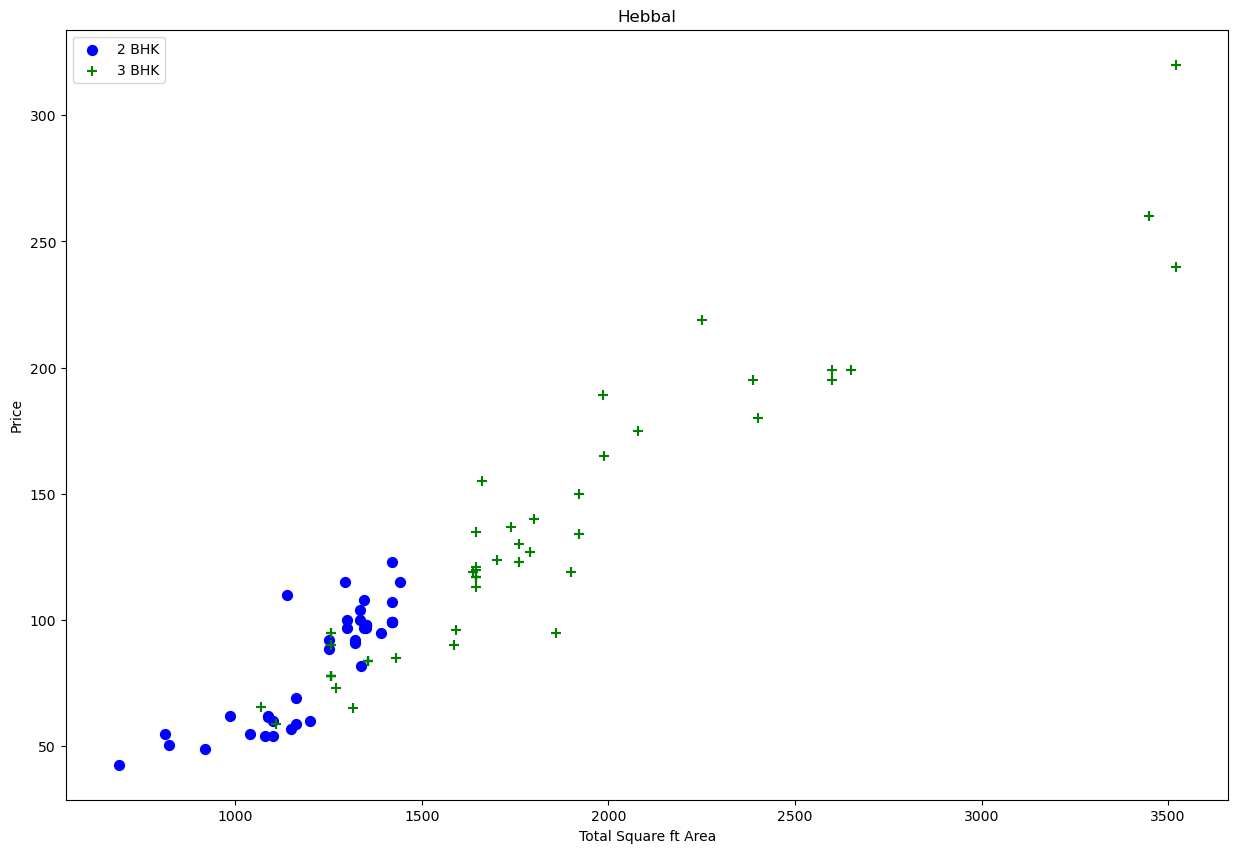

In [224]:
def plt_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square ft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plt_scatter_chart(df8,"Hebbal")

In [225]:
def rem_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for BHK,bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9=rem_bhk_outliers(df8)
df9.shape

(7206, 7)

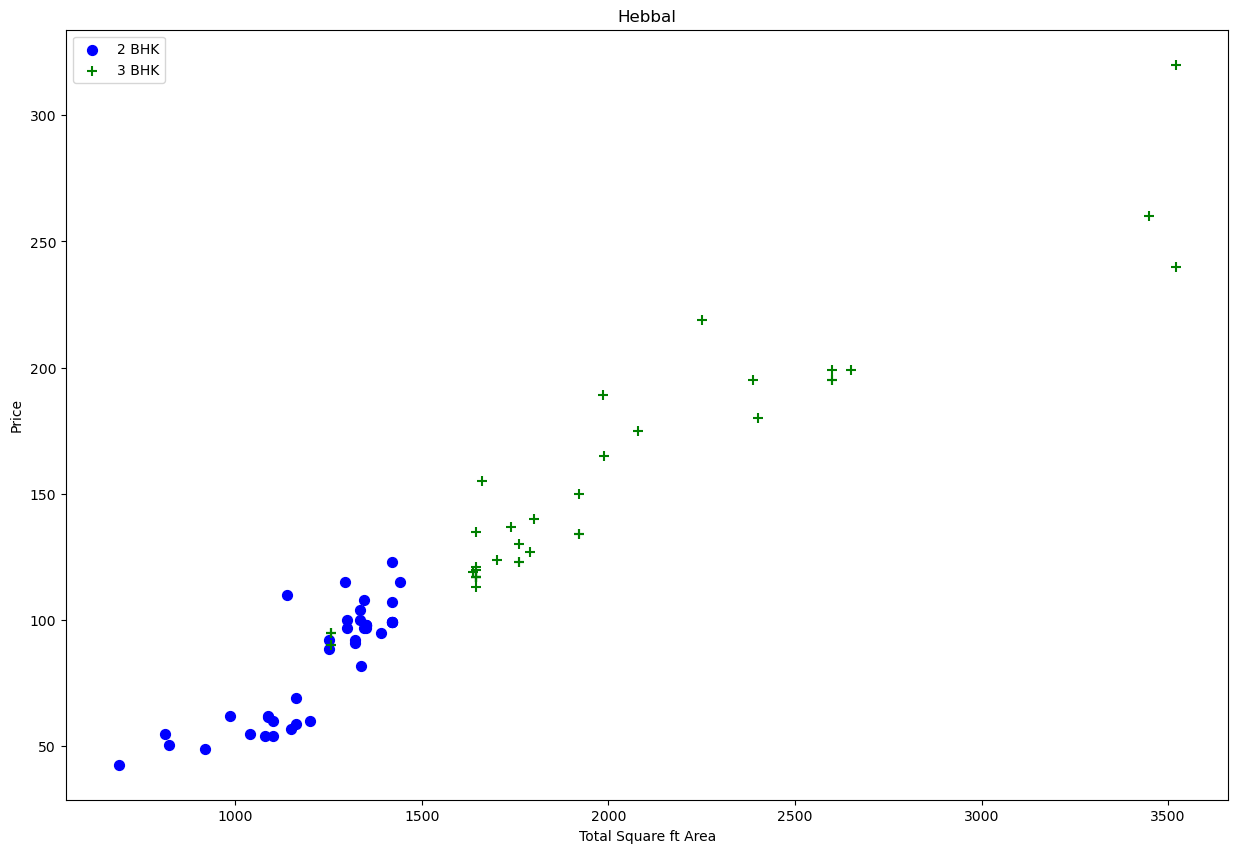

In [226]:
plt_scatter_chart(df9,"Hebbal")

Text(0, 0.5, 'Count')

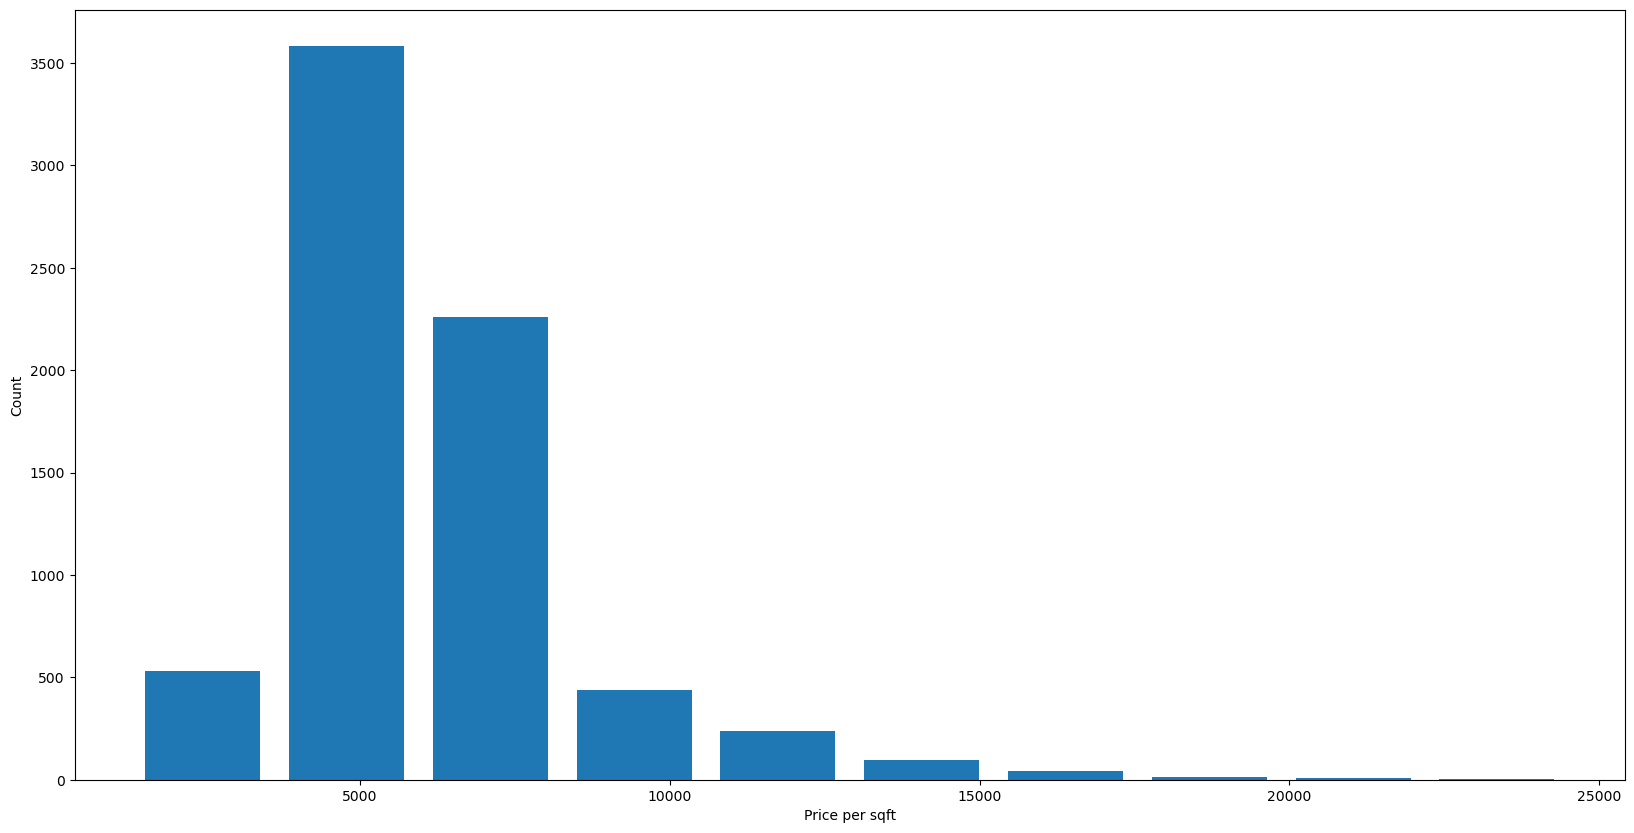

In [227]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

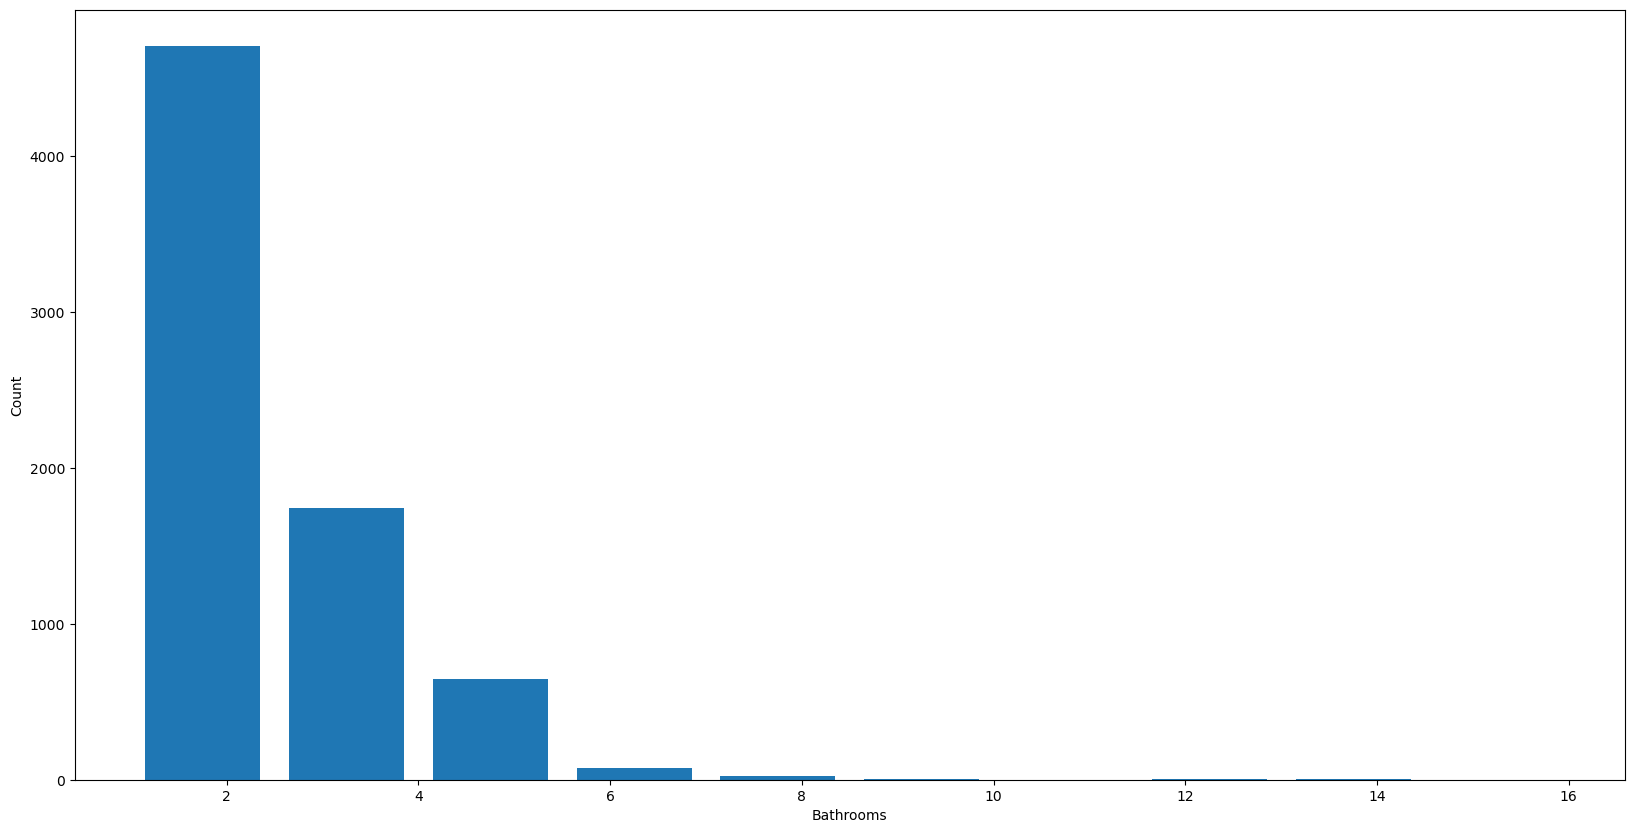

In [228]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [229]:
df10=df9[df9.bath<df9.BHK+2]
df10.shape

(7130, 7)

In [230]:
df10=df10.drop(['price_per_sqft','bedroom_space'],axis='columns')

In [231]:
df10

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
9987,other,1200.0,2.0,70.0,2
9988,other,1800.0,1.0,200.0,1
9991,other,1353.0,2.0,110.0,2
9992,other,812.0,1.0,26.0,1


In [232]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
df11=pd.concat([df10,dummies.drop(['other'],axis='columns')],axis='columns')

In [234]:
df11

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
df11.shape

(7130, 259)

In [236]:
df12=df11.drop(['location'],axis='columns')

In [237]:
df12

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
X= df12.drop('price',axis='columns')

In [239]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
y=df12.price

In [241]:
y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9987     70.0
9988    200.0
9991    110.0
9992     26.0
9995    400.0
Name: price, Length: 7130, dtype: float64

In [242]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [243]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8961622034644805

In [244]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87897097, 0.91569454, 0.8266927 , 0.81929389, 0.83101923])

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [254]:
def best_model(m,n):
    algos={
         
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'Decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(m,n)
        scores.append({
            'model':algo_name,
             'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [255]:
best_model(X,y)
            

D:\bio\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\bio\New folder\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\bio\New folder\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "D:\bio\New folder\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "D:\bio\New folder\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    valida

,model,best_score,best_params
0,lasso,0.704106,"{'alpha': 1, 'selection': 'random'}"
1,Decision_tree,0.736074,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
